In [1]:
#Dota hero clustering using k-means

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')

In [4]:
#Defining a simple function to return an accuracy metric
#Comparing cluster assignment by k-means algorithm to true category

def get_accuracy(df, correct, predicted):
    incorrect = 0
    for i in range(len(df)):
        if df.iloc[i][correct] != df.iloc[i][predicted]:
            incorrect += 1
        else:
            continue
    return 1-(round(incorrect/len(df),2))

In [6]:
heroes = pd.read_csv('dota_heroes728.csv')

In [8]:
heroes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 52 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Hero                120 non-null    object 
 1   Strength            120 non-null    object 
 2   Agility             120 non-null    object 
 3   Intelligence        120 non-null    object 
 4   Health_base         120 non-null    int64  
 5   Health_lvl1         120 non-null    int64  
 6   Health_lvl15        120 non-null    int64  
 7   Health_lvl25        120 non-null    int64  
 8   Health_lvl30        120 non-null    int64  
 9   Health regen_base   120 non-null    float64
 10  Health regen_lvl1   120 non-null    float64
 11  Health regen_lvl15  120 non-null    float64
 12  Health regen_lvl25  120 non-null    float64
 13  Health regen_lvl30  120 non-null    float64
 14  Mana_base           120 non-null    int64  
 15  Mana_lvl1           120 non-null    int64  
 16  Mana_lvl

In [9]:
#Getting rid of columns that would directly indicate to the classifier the category of the hero
#as well as information that could not logically help here, most likely
heroes.drop(columns=['Strength', 'Intelligence', 'Agility', 'Legs', 'Gib type'], inplace=True)

In [10]:
#Dropping intermediary attribute levels
heroes.drop(columns=['Health_lvl15', 'Health_lvl25', 'Health regen_lvl15', 'Health regen_lvl25',
                    'Mana_lvl15', 'Mana_lvl25', 'Mana regen_lvl15', 'Mana regen_lvl25', 'Armor_lvl15', 'Armor_lvl25',
                    'Att/sec_lvl15', 'Att/sec_lvl25', 'Damage_lvl15', 'Damage_lvl25'], inplace=True)

In [11]:
#Further surface-level exploratory analysis

In [12]:
heroes['Collision size'].values

array([24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       24, 24,  8, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,  8, 24,
       24, 24, 24, 24, 24,  8, 24,  8, 24, 24, 24,  8, 24, 24, 24, 24, 24,
       24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       24])

In [13]:
heroes['Damage block'].values

array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 0, 0, 8, 8, 8, 8, 8, 8,
       8, 8, 0, 8, 8, 8, 0, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 0, 8, 8, 8,
       0, 0, 8, 8, 0, 0, 8, 0, 0, 0, 8, 0, 8, 0, 8, 8, 8, 8, 8, 0, 8, 0,
       8, 0, 8, 0, 8, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 8, 0, 0, 0, 0, 0])

In [14]:
heroes['Base attack time'].values

array([1.7, 1.7, 1.7, 1.7, 1.7, 1.8, 1.7, 1.7, 1.7, 2. , 1.7, 1.7, 1.7,
       1.7, 1.6, 1.7, 1.7, 1.7, 1.7, 1.7, 1.8, 1.8, 1.7, 1.7, 1.7, 1.7,
       1.7, 1.7, 1.6, 1.9, 1.8, 1.7, 1.7, 1.7, 1.9, 1.7, 1.7, 1.7, 1.7,
       1.4, 1.7, 1.7, 1.7, 1.7, 1.7, 1.7, 1.7, 1.7, 1.7, 2. , 1.4, 1.7,
       1.7, 1.7, 1.7, 1.7, 1.7, 1.5, 1.7, 1.7, 1.7, 1.7, 1.7, 1.7, 1.7,
       1.7, 1.7, 1.7, 1.7, 1.7, 1.5, 1.7, 1.7, 1.7, 1.7, 1.7, 1.8, 1.7,
       1.7, 1.7, 1.7, 1.7, 1.7, 1.5, 1.7, 1.7, 1.7, 1.7, 1.7, 1.7, 1.7,
       1.7, 1.7, 1.7, 1.7, 1.6, 1.7, 1.7, 1.7, 1.7, 1.7, 1.9, 1.7, 1.7,
       1.5, 1.7, 1.7, 1.7, 1.7, 1.7, 1.7, 1.7, 1.7, 1.7, 1.7, 1.7, 1.5,
       1.7, 1.7, 1.7])

In [15]:
heroes['Vision range'].values

array(['1800/800', '1800/800', '1800/800', '1800/800', '1800/800',
       '1800/800', '1800/800', '1800/800', '1800/800', '1800/800',
       '1800/800', '1800/800', '1800/800', '1800/800', '1800/800',
       '1800/800', '1800/800', '1800/800', '1800/800', '1800/800',
       '1800/800', '1800/800', '800/1800', '1800/800', '1800/800',
       '1800/800', '1800/800', '1800/800', '1800/800', '1800/800',
       '1800/800', '1800/800', '1800/800', '1800/800', '1800/800',
       '1800/800', '1800/800', '1800/800', '1800/800', '1800/800',
       '1800/800', '1800/800', '1800/1000', '1800/800', '1800/800',
       '1800/800', '1800/800', '1800/800', '1800/800', '1800/800',
       '1800/800', '1800/800', '1800/800', '1800/800', '1800/800',
       '1800/800', '1800/800', '1800/800', '1800/800', '1800/800',
       '1800/800', '1800/800', '1800/800', '1800/800', '1800/800',
       '1800/800', '1800/1800', '1800/1400', '1800/800', '1800/800',
       '1800/800', '1800/800', '1800/800', '1800/800', '180

In [16]:
heroes.drop(columns=['Collision size', 'Base attack time', 'Vision range'], inplace=True)

In [17]:
heroes['Magic resistance'].values

array(['25%', '25%', '25%', '25%', '25%', '25%', '25%', '25%', '25%',
       '25%', '25%', '25%', '25%', '25%', '25%', '25%', '25%', '25%',
       '25%', '25%', '25%', '25%', '25%', '25%', '25%', '25%', '25%',
       '25%', '25%', '25%', '25%', '25%', '25%', '25%', '25%', '25%',
       '25%', '25%', '25%', '25%', '25%', '25%', '25%', '25%', '25%',
       '25%', '25%', '25%', '25%', '25%', '25%', '25%', '25%', '25%',
       '25%', '25%', '25%', '25%', '25%', '25%', '25%', '25%', '25%',
       '25%', '25%', '25%', '25%', '25%', '25%', '25%', '25%', '25%',
       '25%', '25%', '25%', '25%', '25%', '25%', '25%', '25%', '25%',
       '25%', '25%', '25%', '25%', '25%', '25%', '25%', '25%', '25%',
       '25%', '25%', '25%', '25%', '25%', '25%', '25%', '25%', '25%',
       '25%', '25%', '25%', '25%', '25%', '25%', '25%', '25%', '25%',
       '25%', '25%', '25%', '25%', '25%', '25%', '25%', '25%', '25%',
       '25%', '25%', '25%'], dtype=object)

In [18]:
heroes.drop(columns=['Attack animation', 'Magic resistance', 'Health_base', 'Mana_base',
                    'Damage_base'], inplace=True)

In [19]:
#Ranges will not be able to be parsed
heroes.drop(columns=['Damage_lvl1', 'Damage_lvl30'], inplace=True)

In [20]:
#Classifier cannot parse non-numeric input
heroes['Projectile speed'].replace({'Instant':'0'}, inplace=True)

In [21]:
#Adding column with category of each hero for eventual algorithm evaluation purposes

cats = {
    'Strength':['Abaddon', 'Alchemist', 'Axe', 'Beastmaster', 'Brewmaster',
       'Bristleback', 'Centaur_Warrunner', 'Chaos_Knight', 'Clockwerk',
       'Doom', 'Dragon_Knight', 'Earth_Spirit', 'Earthshaker',
       'Elder_Titan', 'Huskar', 'Io', 'Kunkka', 'Legion_Commander',
       'Lifestealer', 'Lycan', 'Magnus', 'Mars', 'Night_Stalker',
       'Omniknight', 'Phoenix', 'Pudge', 'Sand_King', 'Slardar',
       'Snapfire', 'Spirit_Breaker', 'Sven', 'Tidehunter', 'Timbersaw',
       'Tiny', 'Treant_Protector', 'Tusk', 'Underlord', 'Undying',
       'Wraith_King'],
    'Intelligence':['Ancient_Apparition', 'Bane', 'Batrider', 'Chen', 'Crystal_Maiden',
       'Dark_Seer', 'Dark_Willow', 'Dazzle', 'Death_Prophet', 'Disruptor',
       'Enchantress', 'Enigma', 'Grimstroke', 'Invoker', 'Jakiro',
       'Keeper_of_the_Light', 'Leshrac', 'Lich', 'Lina', 'Lion',
       "Nature's_Prophet", 'Necrophos', 'Ogre_Magi', 'Oracle',
       'Outworld_Destroyer', 'Puck', 'Pugna', 'Queen_of_Pain', 'Rubick',
       'Shadow_Demon', 'Shadow_Shaman', 'Silencer', 'Skywrath_Mage',
       'Storm_Spirit', 'Techies', 'Tinker', 'Visage', 'Void_Spirit',
       'Warlock', 'Windranger', 'Winter_Wyvern', 'Witch_Doctor', 'Zeus'],
    'Agility':['Anti-Mage', 'Arc_Warden', 'Bloodseeker', 'Bounty_Hunter',
       'Broodmother', 'Clinkz', 'Drow_Ranger', 'Ember_Spirit',
       'Faceless_Void', 'Gyrocopter', 'Hoodwink', 'Juggernaut',
       'Lone_Druid', 'Luna', 'Medusa', 'Meepo', 'Mirana', 'Monkey_King',
       'Morphling', 'Naga_Siren', 'Nyx_Assassin', 'Pangolier',
       'Phantom_Assassin', 'Phantom_Lancer', 'Razor', 'Riki',
       'Shadow_Fiend', 'Slark', 'Sniper', 'Spectre', 'Templar_Assassin',
       'Terrorblade', 'Troll_Warlord', 'Ursa', 'Vengeful_Spirit',
       'Venomancer', 'Viper', 'Weaver']
}

heroes['Category'] = (heroes['Hero'].apply(lambda x: [k for k in cats.keys() if x in cats[k]]).str[0])

#Encoding each category numerically
heroes.replace({'Strength':0, 'Intelligence':1, 'Agility':2}, inplace=True)

In [22]:
#Initial clustering attempt

In [23]:
#Scaling the data: k-means is sensitive to the scale of variables
#We have mixed numerical data, different sorts of units to deal with
scaler = StandardScaler()
scaled = scaler.fit_transform(heroes.drop(columns=['Hero', 'Category']))
kmeans = KMeans(init='random', n_clusters=3, n_init=10, max_iter=300, random_state=14)
kmeans.fit(scaled)

KMeans(init='random', n_clusters=3, random_state=14)

In [24]:
#Adding k-means categories to data frame
heroes['clusters_1'] = kmeans.labels_

In [25]:
heroes[['Hero', 'Category', 'clusters_1']]

,Hero,Category,clusters_1
0,Abaddon,0,0
1,Alchemist,0,0
2,Axe,0,0
3,Beastmaster,0,0
4,Brewmaster,0,0
5,Bristleback,0,0
6,Centaur_Warrunner,0,0
7,Chaos_Knight,0,0
8,Clockwerk,0,0
9,Doom,0,0


In [26]:
#Accuracy metrics for first round of clustering

strength = heroes[heroes['Category'] == 0][['Hero', 'Category', 'clusters_1']]
intelligence = heroes[heroes['Category'] == 1][['Hero', 'Category', 'clusters_1']]
agility = heroes[heroes['Category'] == 2][['Hero', 'Category', 'clusters_1']]

print('Strength: ', get_accuracy(strength, 'Category', 'clusters_1'))
print('Intelligence: ', get_accuracy(intelligence, 'Category', 'clusters_1'))
print('Agility: ', get_accuracy(agility, 'Category', 'clusters_1'))

Strength:  0.87
Intelligence:  0.86
Agility:  0.5


In [27]:
#We can do better!

In [28]:
#Visualizations

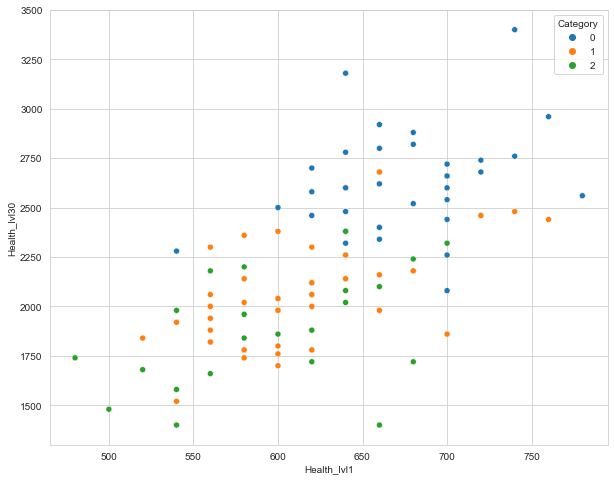

In [29]:
#Health at level 1 versus maximum health

plt.figure(figsize=(10,8))
sns.scatterplot(data=heroes, x='Health_lvl1', y='Health_lvl30', hue='Category', palette='tab10');

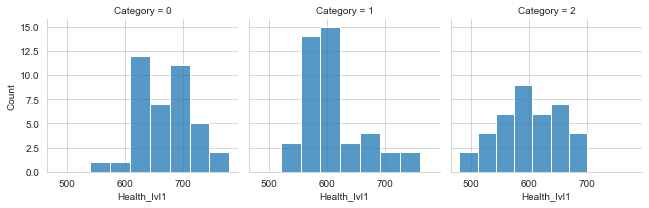

In [30]:
#Health at level 1 for each category

f = sns.FacetGrid(data=heroes, col='Category')
f.map(sns.histplot, 'Health_lvl1');

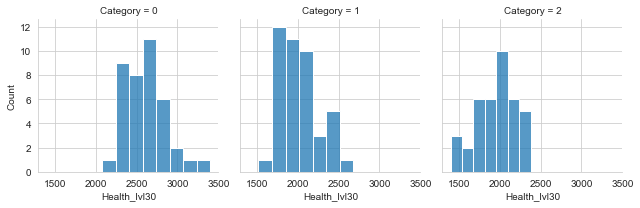

In [31]:
#Maximum health for each category

f = sns.FacetGrid(data=heroes, col='Category')
f.map(sns.histplot, 'Health_lvl30');

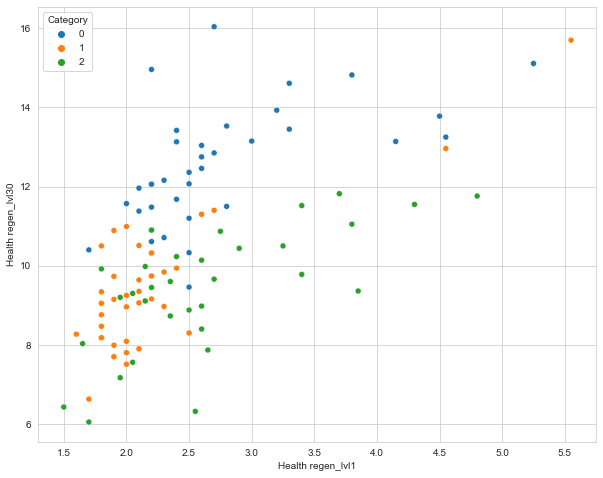

In [32]:
#Health regen at level 1 versus maximum

plt.figure(figsize=(10,8))
sns.scatterplot(data=heroes, x='Health regen_lvl1', y='Health regen_lvl30', hue='Category', palette='tab10');

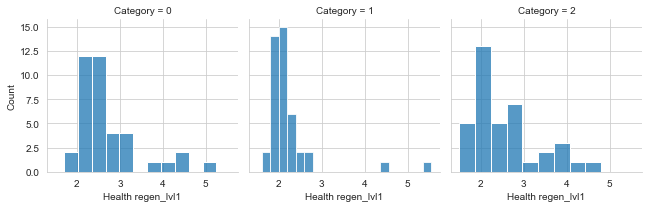

In [33]:
#Health regen at level 1 for each category

f = sns.FacetGrid(data=heroes, col='Category')
f.map(sns.histplot, 'Health regen_lvl1');

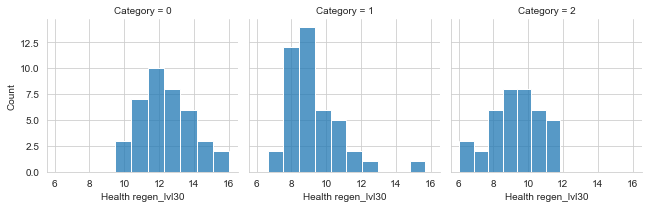

In [34]:
#Maximum health regen for each category

f = sns.FacetGrid(data=heroes, col='Category')
f.map(sns.histplot, 'Health regen_lvl30');

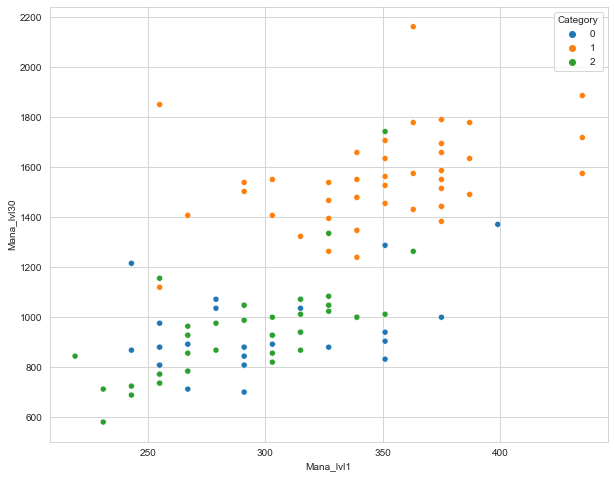

In [35]:
#Mana at level 1 versus maximum

plt.figure(figsize=(10,8))
sns.scatterplot(data=heroes, x='Mana_lvl1', y='Mana_lvl30', hue='Category', palette='tab10');

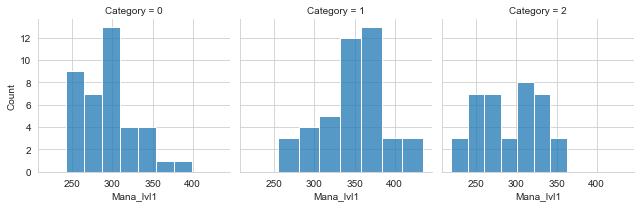

In [36]:
#Mana at level 1 for each category

f = sns.FacetGrid(data=heroes, col='Category')
f.map(sns.histplot, 'Mana_lvl1');

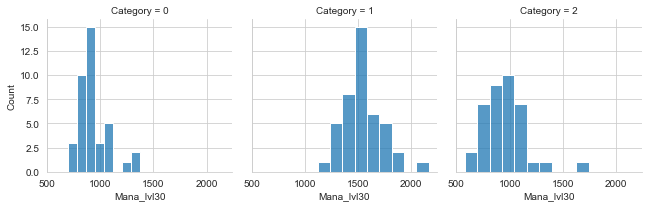

In [37]:
#Maximum mana for each category

f = sns.FacetGrid(data=heroes, col='Category')
f.map(sns.histplot, 'Mana_lvl30');

<AxesSubplot:xlabel='Mana regen_lvl1', ylabel='Mana regen_lvl30'>

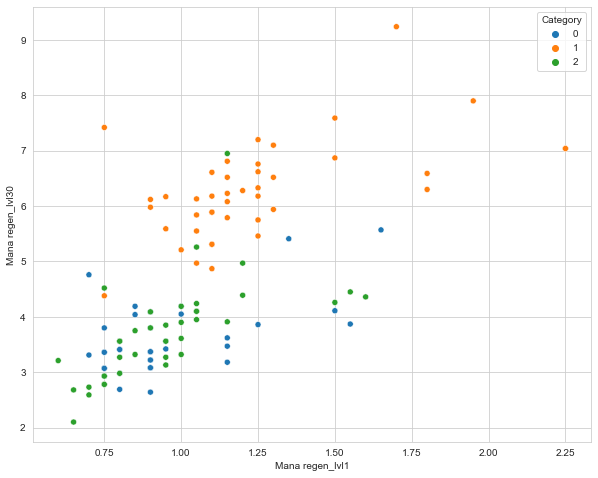

In [38]:
#Level 1 mana regen versus maximum

plt.figure(figsize=(10,8))
sns.scatterplot(data=heroes, x='Mana regen_lvl1', y='Mana regen_lvl30', hue='Category', palette='tab10')

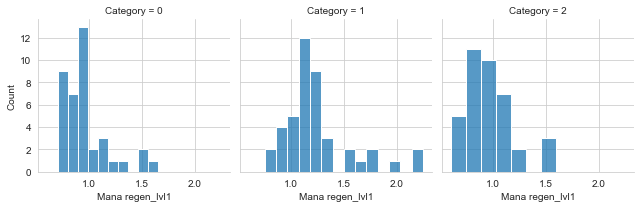

In [39]:
#Level 1 mana regen for each category

f = sns.FacetGrid(data=heroes, col='Category')
f.map(sns.histplot, 'Mana regen_lvl1');

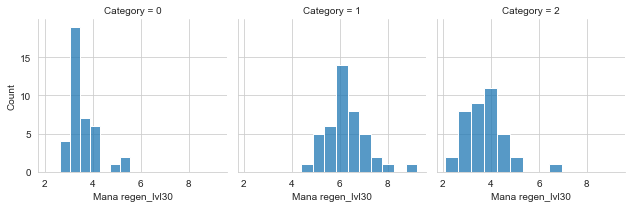

In [40]:
#Maximum mana regen for each category

f = sns.FacetGrid(data=heroes, col='Category')
f.map(sns.histplot, 'Mana regen_lvl30');

<AxesSubplot:xlabel='Armor_lvl1', ylabel='Armor_lvl30'>

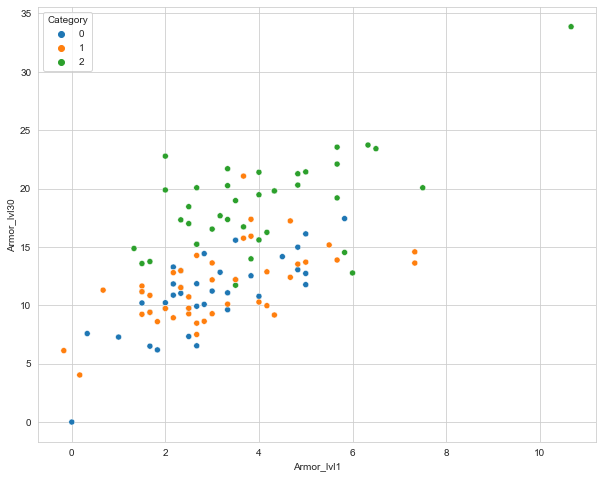

In [41]:
#Level 1 armor versus maximum armor

plt.figure(figsize=(10,8))
sns.scatterplot(data=heroes, x='Armor_lvl1', y='Armor_lvl30', hue='Category', palette='tab10')

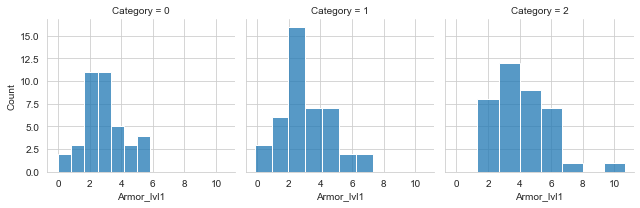

In [42]:
#Level 1 armor for each category

f = sns.FacetGrid(data=heroes, col='Category')
f.map(sns.histplot, 'Armor_lvl1');

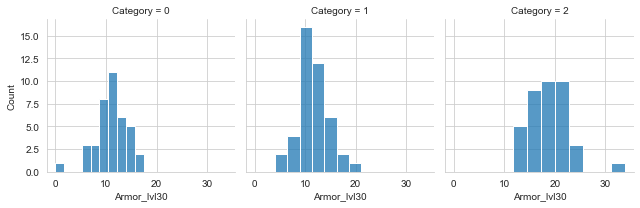

In [43]:
#Max armor for each category

f = sns.FacetGrid(data=heroes, col='Category')
f.map(sns.histplot, 'Armor_lvl30');

<AxesSubplot:xlabel='Att/sec_lvl1', ylabel='Att/sec_lvl30'>

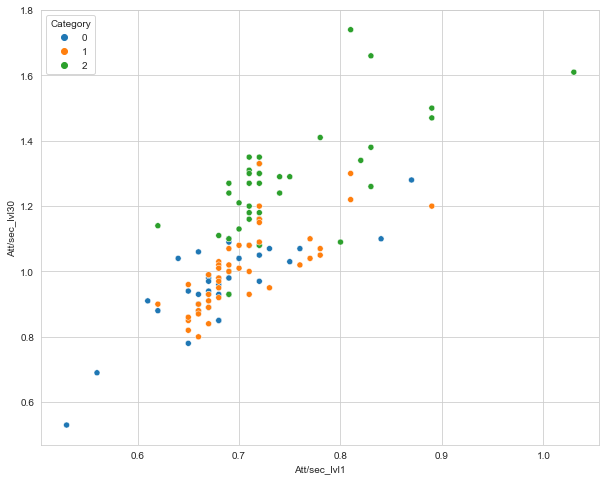

In [44]:
#Level 1 versus maximum attack rate

plt.figure(figsize=(10,8))
sns.scatterplot(data=heroes, x='Att/sec_lvl1', y='Att/sec_lvl30', hue='Category', palette='tab10')

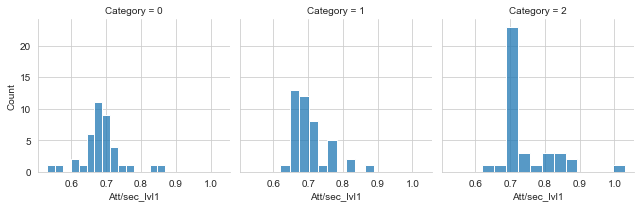

In [45]:
#Level 1 attack rate for each category

f = sns.FacetGrid(data=heroes, col='Category')
f.map(sns.histplot, 'Att/sec_lvl1');

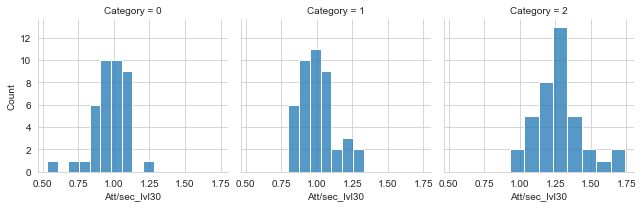

In [46]:
#Maximum attack rate for each category

f = sns.FacetGrid(data=heroes, col='Category')
f.map(sns.histplot, 'Att/sec_lvl30');

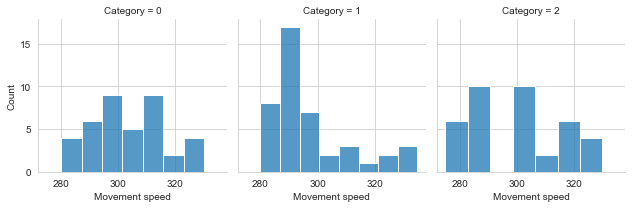

In [47]:
#Movement speed

f = sns.FacetGrid(data=heroes, col='Category')
f.map(sns.histplot, 'Movement speed');

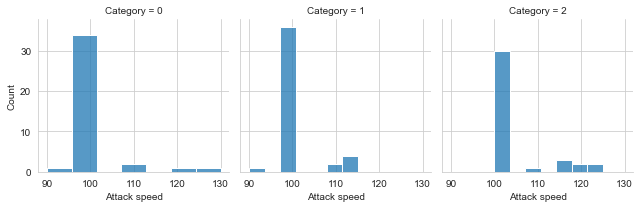

In [48]:
#Attack speed

f = sns.FacetGrid(data=heroes, col='Category')
f.map(sns.histplot, 'Attack speed');

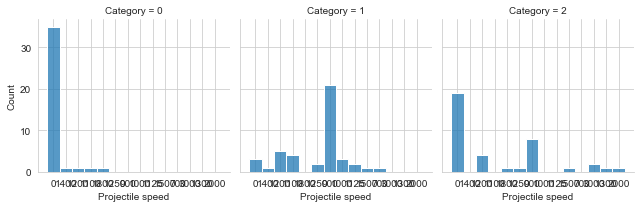

In [49]:
#Projectile speed

f = sns.FacetGrid(data=heroes, col='Category')
f.map(sns.histplot, 'Projectile speed');

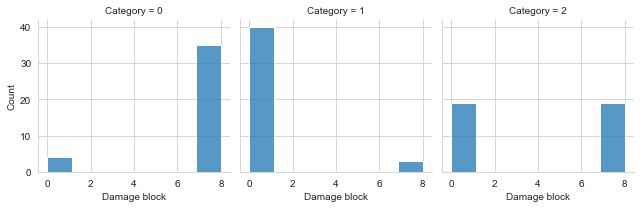

In [50]:
#Damage block

f = sns.FacetGrid(data=heroes, col='Category')
f.map(sns.histplot, 'Damage block');

In [51]:
#Dropping various columns based on observations gleaned from visualization
heroes.drop(columns=['Health regen_base', 'Health regen_lvl1', 'Mana regen_base',
                        'Mana regen_lvl1', 'Mana regen_lvl30', 'Armor_base', 'Armor_lvl1',
                        'Att/sec_base', 'Att/sec_lvl1', 'Attack speed'], inplace=True)

In [52]:
#What else could we examine?

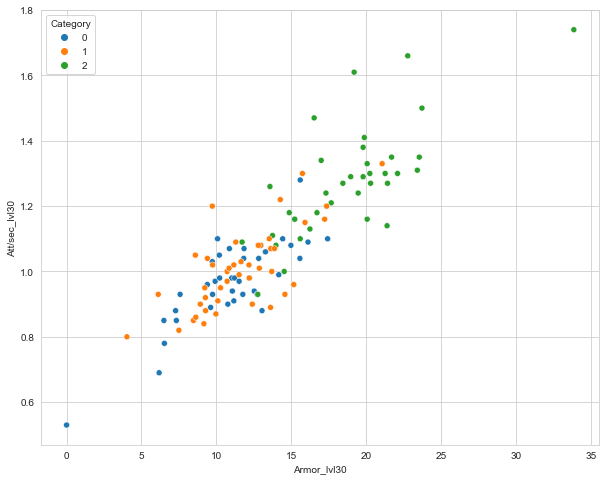

In [53]:
#Armor and attack rate

plt.figure(figsize=(10,8))
sns.scatterplot(data=heroes, x='Armor_lvl30', y='Att/sec_lvl30', hue='Category', palette='tab10');

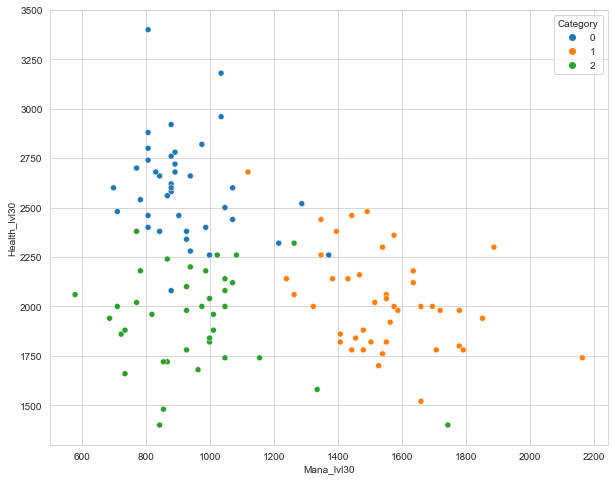

In [54]:
#Maximum mana and maximum health

plt.figure(figsize=(10,8))
sns.scatterplot(data=heroes, x='Mana_lvl30', y='Health_lvl30', hue='Category', palette='tab10');

In [55]:
#Observing some natural clustering!

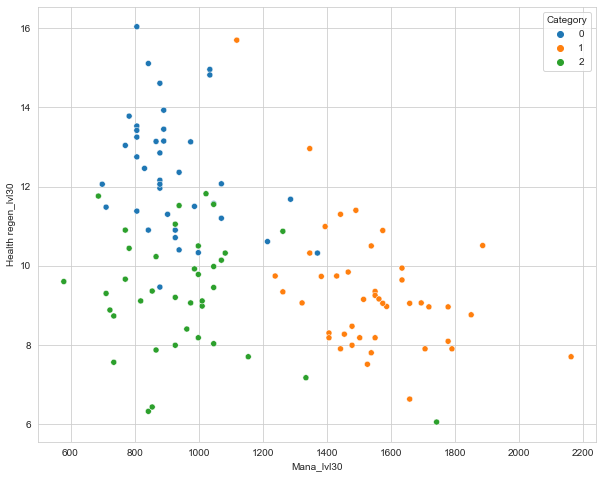

In [56]:
#Maximum mana and maximum health regen

plt.figure(figsize=(10,8))
sns.scatterplot(data=heroes, x='Mana_lvl30', y='Health regen_lvl30', hue='Category', palette='tab10');

In [57]:
#More clustering can be observed

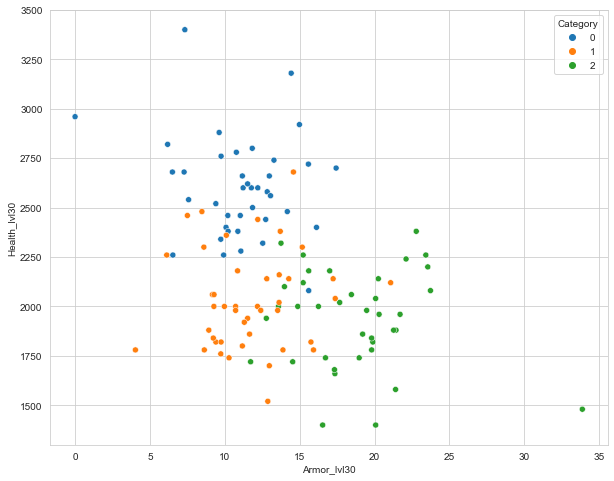

In [58]:
#Maximum armor and maximum health

plt.figure(figsize=(10,8))
sns.scatterplot(data=heroes, x='Armor_lvl30', y='Health_lvl30', hue='Category', palette='tab10');

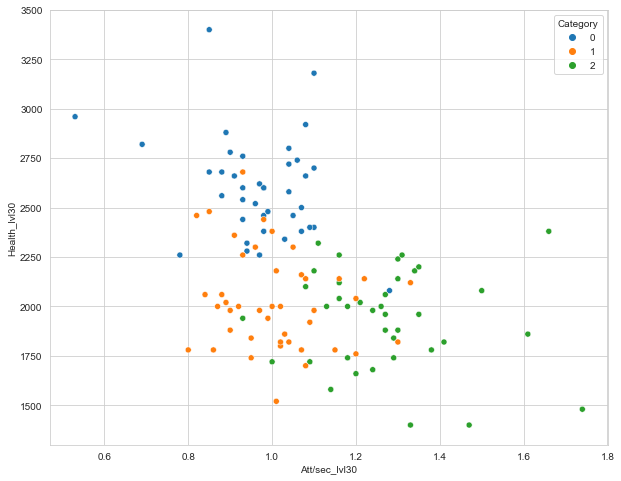

In [59]:
#Maximum attack rate and maximum health

plt.figure(figsize=(10,8))
sns.scatterplot(data=heroes, x='Att/sec_lvl30', y='Health_lvl30', hue='Category', palette='tab10');

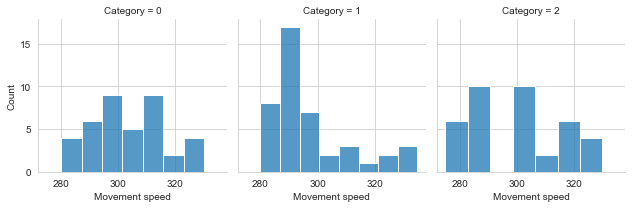

In [60]:
#Movement speed

f = sns.FacetGrid(data=heroes, col='Category')
f.map(sns.histplot, 'Movement speed');

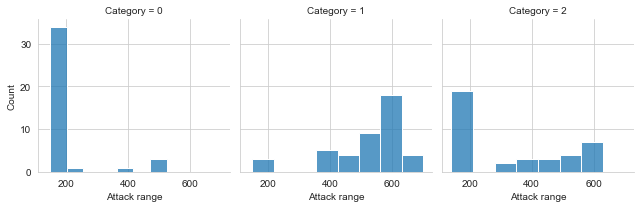

In [61]:
#Attack range

f = sns.FacetGrid(data=heroes, col='Category')
f.map(sns.histplot, 'Attack range');

In [62]:
#Extremely noticeable natural clustering is exhibited for the first 5 predictors
#Health, health regen, mana, armor, and attack rate
#These seem most likely to yield the best results
#Overloading the algorithm with features will most likely lead to a drop in accuracy

In [63]:
#Applying k-means once again

In [65]:
#Scaling
scaler2 = StandardScaler()
scaled2 = scaler.fit_transform(heroes[['Health_lvl30', 'Health regen_lvl30', 'Mana_lvl30', 'Armor_lvl30', 
                                      'Att/sec_lvl30']])
kmeans2 = KMeans(init='random', n_clusters=3, n_init=10, max_iter=300, random_state=14)
kmeans2.fit(scaled2)

KMeans(init='random', n_clusters=3, random_state=14)

In [66]:
heroes['clusters_2'] = kmeans2.labels_

In [67]:
heroes[['Category', 'clusters_2']]

,Category,clusters_2
0,0,2
1,0,2
2,0,2
3,0,2
4,0,2
5,0,2
6,0,2
7,0,2
8,0,2
9,0,2


In [69]:
#Swapping assigned labels to conform to encoding order of true categories
heroes['clusters_2'].replace({2:0, 0:2}, inplace=True)

In [70]:
#Accuracy metrics for final round of clustering

strength = heroes[heroes['Category'] == 0][['Hero', 'Category', 'clusters_2']]
intelligence = heroes[heroes['Category'] == 1][['Hero', 'Category', 'clusters_2']]
agility = heroes[heroes['Category'] == 2][['Hero', 'Category', 'clusters_2']]

print('Strength: ', get_accuracy(strength, 'Category', 'clusters_2'))
print('Intelligence: ', get_accuracy(intelligence, 'Category', 'clusters_2'))
print('Agility: ', get_accuracy(agility, 'Category', 'clusters_2'))

Strength:  0.95
Intelligence:  0.84
Agility:  0.92


In [ ]:
#Strength and agility heroes are classified with high accuracy
#Why might intelligence hero classification be slightly less accurate?

#Intelligence heroes are largely defined by mana-related attributes
#Mana regeneration was dropped as a feature as it did not appear to provide a lot of predictive power